# DSGE Models.

_Received help from and worked with at least the following people:_

_Kendra Robbins, Cache Ellsworth, Alberto Quaini, Tim Munday, Matt Brown._

_Thank you to everyone who helped. This was by far the hardest problem set._

_The problem set is unfortunately incomplete. I ran into too many problems with debugging to be able to solve in time._

In [91]:
!pip install dolo

    100% |████████████████████████████████| 112kB 2.8MB/s ta 0:00:01
    100% |████████████████████████████████| 235kB 3.3MB/s ta 0:00:01
  Running setup.py bdist_wheel for dolo ... done
  Stored in directory: /Users/hbeard/Library/Caches/pip/wheels/35/ec/6f/c6ad075a089bb59c1f175406d08c9ea75c1e96344ebaf03914
  Running setup.py bdist_wheel for interpolation ... done
  Stored in directory: /Users/hbeard/Library/Caches/pip/wheels/30/87/4c/9fc62ec4ebebb9e3885d383acf7c45a0f84a4b3f616821f9e9
Successfully built dolo interpolation


In [5]:
import numpy as np
import math
import scipy
import scipy.optimize as opt
import matplotlib
from matplotlib import pyplot as plt
from mpl_toolkits.mplot3d import Axes3D
from rouwen import rouwen
from LinApp_Deriv import LinApp_Deriv
from LinApp_FindSS import LinApp_FindSS
from LinApp_Solve import LinApp_Solve
from dolo import *

## Exercise 1.

First, we guess the policy function as 

$$
\begin{eqnarray*}
k_{t+1} &=& \Phi(k_t, z_t) \\
&=& A\mathrm e ^{z_t} k_t ^\alpha 
\end{eqnarray*}
$$

for some $A$. Plugging back into the Euler Equation,

$$
\frac 1 {\mathrm e ^{z_t} k_t ^\alpha - k_{t+1}} = \beta \cdot \mathbb E _t \left[ \frac {\alpha \mathrm e ^{z_{t+1}} k_{t+1}^{\alpha-1}}{\mathrm e ^{z_{t+1}} k_{t+1} ^\alpha - k_{t+2}} \right],
$$

so

$$
\begin{eqnarray*}
\frac 1 {\mathrm e ^{z_t} k_t ^\alpha (1-A)} &=& \frac 1 {\mathrm e ^{z_t} k_t ^\alpha - A \mathrm e ^{z_t} k_t ^\alpha }\\
&=& \beta \cdot \mathbb E _t \left[ \frac {\alpha \mathrm e ^{z_{t+1}} k_{t+1} ^{\alpha -1}}{\mathrm e ^{z_{t+1}} k_{t+1} ^\alpha - k_{t+2}} \right]\\
&=& \beta \cdot \left( \frac {\alpha \mathrm e ^{\rho z_t} (A\mathrm e ^{z_t} k_t ^\alpha ) ^{\alpha-1}}{\mathrm e ^{\rho z_t} (A\mathrm e ^{z_t} k_t ^\alpha ) ^\alpha (1-A)} \right)\\
&=& \frac {\alpha \beta}{A\mathrm e ^{z_t} k_t ^\alpha (1-A)},
\end{eqnarray*}
$$

yielding

$$
1=\frac {\alpha \beta } {A},
$$

i.e.,

$$
A=\alpha\beta .
$$

## Exercise 2.

Our market-clearing conditions are

$$
\begin{eqnarray*}
\ell_t&=&L_t,\\
k_t&=&K_t,\\
w_t&=&W_t,
\end{eqnarray*}
$$

and

$$
r_t=R_t.
$$

Assuming balanced fiscal budget,

$$
T_t = \tau \cdot \left( w_t \ell_t + k_t \cdot \left( r_t -\delta \right) \right),
$$

and the law of motion

$$
z_t = (1-\rho_z) \bar z + \rho_z z_{t-1} + \varepsilon _t ^z,
$$

for the IID stochastic shocks $\varepsilon_t^z$ with mean $0$ and variance $\sigma_z^2$.

Characterizing Equations:

$$
\begin{eqnarray*}
c_t &=& (1-\tau) \cdot \left( w_t \ell_t + k_t \cdot \left( r_t -\delta \right) \right) + k_t + T_t - k_{t+1}, \\
\frac 1 {c_t} &=& \beta \cdot \mathbb E _t \left[ \frac 1 {c_{t+1}} \cdot \left( (r_{t+1} - \delta) \cdot (1-\tau) +1 \right) \right],\\
\frac a {1-\ell_t} &=& \frac 1 {c_t} \cdot w_t \cdot (1-\tau), \\ 
r_t &=& \alpha \mathrm e ^{z_t} \left( \frac {\ell_t} {k_t} \right) ^{1-\alpha},\\
w_t &=& (1-\alpha) \mathrm e ^{z_t} \left( \frac {k_t} {\ell_t} \right) ^\alpha.
\end{eqnarray*}
$$

## Exercise 3.

Our market-clearing conditions are

$$
\begin{eqnarray*}
\ell_t&=&L_t,\\
k_t&=&K_t,\\
w_t&=&W_t,
\end{eqnarray*}
$$

and

$$
r_t=R_t.
$$

Assuming balanced fiscal budget,

$$
T_t = \tau \cdot \left( w_t \ell_t + k_t \cdot \left( r_t -\delta \right) \right),
$$

and the law of motion

$$
z_t = (1-\rho_z) \bar z + \rho_z z_{t-1} + \varepsilon _t ^z,
$$

for the IID stochastic shocks $\varepsilon_t^z$ with mean $0$ and variance $\sigma_z^2$.

Characterizing Equations:

$$
\begin{eqnarray*}
c_t &=& (1-\tau) \cdot \left( w_t \ell_t + k_t \cdot \left( r_t -\delta \right) \right) + k_t + T_t - k_{t+1}, \\
\frac 1 {c_t^\gamma} &=& \beta \cdot \mathbb E _t \left[ \frac 1 {c_{t+1}^\gamma} \cdot \left( (r_{t+1} - \delta) \cdot (1-\tau) +1 \right) \right],\\
\frac a {1-\ell_t} &=& \frac 1 {c_t^\gamma} \cdot w_t \cdot (1-\tau), \\ 
r_t &=& \alpha \mathrm e ^{z_t} \left( \frac {\ell_t} {k_t} \right) ^{1-\alpha},\\
w_t &=& (1-\alpha) \mathrm e ^{z_t} \left( \frac {k_t} {\ell_t} \right) ^\alpha.
\end{eqnarray*}
$$

## Exercise 4.

Our market-clearing conditions are

$$
\begin{eqnarray*}
\ell_t&=&L_t,\\
k_t&=&K_t,\\
w_t&=&W_t,
\end{eqnarray*}
$$

and

$$
r_t=R_t.
$$

Assuming balanced fiscal budget,

$$
T_t = \tau \cdot \left( w_t \ell_t + k_t \cdot \left( r_t -\delta \right) \right),
$$

and the law of motion

$$
z_t = (1-\rho_z) \bar z + \rho_z z_{t-1} + \varepsilon _t ^z,
$$

for the IID stochastic shocks $\varepsilon_t^z$ with mean $0$ and variance $\sigma_z^2$.

Characterizing Equations:

$$
\begin{eqnarray*}
c_t &=& (1-\tau) \cdot \left( w_t \ell_t + k_t \cdot \left( r_t -\delta \right) \right) + k_t + T_t - k_{t+1}, \\
\frac 1 {c_t^\gamma} &=& \beta \cdot \mathbb E _t \left[ \frac 1 {c_{t+1}^\gamma} \cdot \left( (r_{t+1} - \delta) \cdot (1-\tau) +1 \right) \right],\\
\frac a {\left(1-\ell_t\right)^\xi} &=& \frac 1 {c_t^\gamma} \cdot w_t \cdot (1-\tau), \\ 
r_t &=& \alpha k_t ^ {\eta-1} \mathrm e ^{z_t} \left[ \alpha k_t ^\eta + (1-\alpha ) \ell_t ^\eta \right] ^{\frac 1 \eta -1},\\
w_t &=& (1-\alpha) \ell_t ^{\eta-1} \mathrm e ^{z_t} \left[ \alpha k_t ^\eta +(1-\alpha)\ell_t ^\eta \right] ^{\frac 1 \eta -1}.
\end{eqnarray*}
$$

## Exercise 5.

Our market-clearing conditions are

$$
\begin{eqnarray*}
\ell_t&=&L_t,\\
k_t&=&K_t,\\
w_t&=&W_t,
\end{eqnarray*}
$$

and

$$
r_t=R_t.
$$

Assuming balanced fiscal budget,

$$
T_t = \tau \cdot \left( w_t \ell_t + k_t \cdot \left( r_t -\delta \right) \right),
$$

and the law of motion

$$
z_t = (1-\rho_z) \bar z + \rho_z z_{t-1} + \varepsilon _t ^z,
$$

for the IID stochastic shocks $\varepsilon_t^z$ with mean $0$ and variance $\sigma_z^2$.

Characterizing Equations:

$$
\begin{eqnarray*}
c_t &=& (1-\tau) \cdot \left( w_t \ell_t + k_t \cdot \left( r_t -\delta \right) \right) + k_t + T_t - k_{t+1}, \\
\frac 1 {c_t^\gamma} &=& \beta \cdot \mathbb E _t \left[ \frac 1 {c_{t+1}^\gamma} \cdot \left( (r_{t+1} - \delta) \cdot (1-\tau) +1 \right) \right].
\end{eqnarray*}
$$

$\ell_t =1$, so we have

$$
\begin{eqnarray*}
r_t &=& \alpha \left( \frac {\mathrm e ^{z_t} \ell_t}{k_t} \right)^{1-\alpha}\\
w_t &=& (1-\alpha) \mathrm e ^{z_t} \left( \frac {k_t}{\mathrm e ^{z_t}}\right)^\alpha.
\end{eqnarray*}
$$

Note that $\mathrm e ^{\bar z} = \mathrm e ^0 =1$ so

$$
\begin{eqnarray*}
\bar c &=& \bar w +(\bar r -\delta)\bar k \\
\frac 1 {\bar c ^\gamma} &=& \beta \cdot\frac 1 {\bar c ^\gamma} \left[ \left( \bar r -\delta \right) (1-\tau) +1 \right] \\
\bar r &=& \alpha \left( \frac 1 {\bar k} \right) ^{1-\alpha} \\
\bar w &=& (1-\alpha) \cdot \left(\bar k \right) ^\alpha.
\end{eqnarray*}
$$

Solving for $\bar r$,

$$
\begin{eqnarray*}
\bar r &=& \delta + \frac{1 - \beta}{\beta \cdot (1 - \tau)} \\
&=& \frac{1 - \beta + \delta \cdot \beta(1 - \tau)}{\beta \cdot(1 - \tau)}.
\end{eqnarray*}
$$

Solving for $\bar k $,

$$
\begin{eqnarray*}
\bar k &=& \left( \frac \alpha {\bar r} \right) ^{\frac 1 {1 - \alpha}} , \\
&=& \left( \frac {\alpha \cdot \beta\cdot\left(1 -\tau\right)}{1 - \beta + \delta \cdot \beta \cdot \left(1 - \tau\right)} \right) ^{\frac 1 {1 - \alpha}}.
\end{eqnarray*}
$$

Solving for $\bar w$,

$$
\begin{eqnarray*}
\bar w &=& (1 - \alpha) \cdot  \bar{k} ^\alpha , \\
&=& (1 - \alpha)\cdot\left(\frac{\alpha \cdot \beta\cdot\left(1 -\tau\right)}{1 - \beta + \delta \cdot \beta\cdot (1 -\tau)} \right)^{\frac \alpha {1 - \alpha}}. 
\end{eqnarray*}
$$

Finally,

$$ 
\begin{eqnarray*}
\bar c &=& \bar w + (\bar r - \delta) \bar k, \\
\bar Y &=& \bar{k} ^\alpha, \\
\bar I &=& \delta \cdot \bar k .
\end{eqnarray*}
$$

In [15]:
def def_params():
    γ = 2.5
    β = 0.98
    α = 0.40
    δ = 0.10
    z_ss = 0
    τ = 0.05
    return (γ,β,α,δ,z_ss,τ)

In [22]:
def problem1_5_1(params):
    γ, β, α, δ, z_ss, τ = params
    print(" •  r:", δ+(1-β)/(β*(1-τ)),"\n",
          "•  k:", (α/(δ+(1-β)/(β*(1-τ))))**(1/(1-α)),"\n",
          "•  w:", (1-α)*((α/(δ+(1-β)/(β*(1-τ))))**(1/(1-α)))**α,"\n",
          "•  c:", (((1-α)*((α/(δ+(1-β)/(β*(1-τ))))**(1/(1-α)))**α)+
                    ((δ+(1-β)/(β*(1-τ)))-δ)*((α/(δ+(1-β)/(β*(1-τ))))**(1/(1-α)))),"\n",
          "•  Y:", ((α/(δ+(1-β)/(β*(1-τ))))**(1/(1-α)))**α,"\n",
          "•  I:", δ*((α/(δ+(1-β)/(β*(1-τ))))**(1/(1-α)))
         )

In [23]:
problem1_5_1(def_params())

 •  r: 0.1214822771213749 
 •  k: 7.287497950692987 
 •  w: 1.3279527683513055 
 •  c: 1.4845048188495438 
 •  Y: 2.2132546139188425 
 •  I: 0.7287497950692987


Characterizing Equations for SS:


$$
\begin{eqnarray*}
\bar c &=& \bar w + \left(\bar r - \delta\right)\cdot \bar k \\
\frac 1 {\bar {c}^\gamma} &=& \beta \cdot \frac 1 {\bar {c}^\gamma} \cdot \left(\left(\bar r -\delta\right)\cdot (1 - \tau) + 1\right) \\
\bar r &=& \alpha \left(\frac 1 {\bar k}\right)^{1 - \alpha} \\
\bar w &=& (1 - \alpha) \cdot \left(\bar k\right)^\alpha. \\
\end{eqnarray*}
$$



In [29]:
def problem1_5_2(x,*args):
    γ, β, α, δ, z_ss, τ = args
    k,l=x[0],1
    return (1/((((1-α)*np.exp(z_ss)*((k/np.exp(z_ss))**α))*l+((α*((l*np.exp(z_ss)/k)**(1-α)))-δ)*k)**γ)
            -(β/((((1-α)*np.exp(z_ss)*((k/np.exp(z_ss))**α))*l+((α*((l*np.exp(z_ss)/k)**(1-α)))-δ)*k)**γ))
            *((1-τ)*((α*((l*np.exp(z_ss)/k)**(1-α)))-δ)+1))

In [31]:
def problem1_5_3():
    
    γ, β, α, δ, z_ss, τ = def_params()
    
    k_0 = 7
    k = opt.fsolve(problem1_5_2, k_0, args=def_params())
    
    print(" •  r:",α*((np.exp(z_ss)/k)**(1-α)),"\n",
          "•  k:",k,"\n",
          "•  w:",(1-α)*k**α,"\n",
          "•  c:",((1-α)*k**α)+((α*((np.exp(z_ss)/k)**(1-α)))-δ)*k,"\n",
          "•  Y:",k**α,"\n",
          "•  I:",δ*k
         )

In [32]:
problem1_5_3()

 •  r: [0.12148228] 
 •  k: [7.28749795] 
 •  w: [1.32795277] 
 •  c: [1.48450482] 
 •  Y: [2.21325461] 
 •  I: [0.7287498]


## Exercise 6.

Our market-clearing conditions are

$$
\begin{eqnarray*}
\ell_t&=&L_t,\\
k_t&=&K_t,\\
w_t&=&W_t,
\end{eqnarray*}
$$

and

$$
r_t=R_t.
$$

With a balanced fiscal budget,

$$
T_t = \tau \cdot \left( w_t \ell_t + k_t \cdot \left( r_t -\delta \right) \right),
$$

and the law of motion

$$
z_t = (1-\rho_z) \bar z + \rho_z z_{t-1} + \varepsilon _t ^z,
$$

for the IID stochastic shocks $\varepsilon_t^z$ with mean $0$ and variance $\sigma_z^2$.

Characterizing Equations:

$$
\begin{eqnarray*}
c_t &=& (1-\tau) \cdot \left( w_t \ell_t + k_t \cdot \left( r_t -\delta \right) \right) + k_t + T_t - k_{t+1}, \\
\frac 1 {c_t^\gamma} &=& \beta \cdot \mathbb E _t \left[ \frac 1 {c_{t+1}^\gamma} \cdot \left( (r_{t+1} - \delta) \cdot (1-\tau) +1 \right) \right], \\
\frac a {\left(1-\ell_t\right)^\xi} &=& \frac 1 {c_t^\gamma} \cdot w_t \cdot (1-\tau), \\ 
r_t &=& \alpha \cdot \mathrm e ^{z_t} \cdot \left( \frac {\mathrm e ^{z_t} \ell_t} {k_t} \right) ^{1-\alpha},\\
w_t &=& (1-\alpha) \cdot \mathrm e ^{z_t} \cdot \left( \frac {k_t} {\mathrm e ^{z_t} \ell_t} \right) ^\alpha.
\end{eqnarray*}
$$

In the steady state, we have

$$
\begin{eqnarray*}
\bar c  &=& \bar w + (\bar r \bar \ell - \delta) \bar k \\
\frac 1 {\bar{c}^\gamma} &=& \beta \cdot {\frac 1 {\bar{c}^\gamma} \cdot \left((\bar r -\delta)\cdot (1 - \tau) + 1\right)} \\
\frac a {\left(1 - \bar{\ell}\right)^\xi} &=& \frac 1 {\bar{c}^\gamma} \cdot \bar w \cdot (1 - \tau) \\ 
\bar r &=& \alpha \mathrm e ^{\bar z} \left(\frac{\bar \ell \mathrm e ^{\bar z}}{\bar k}\right) ^{1 - \alpha} \\
\bar w &=& (1 - \alpha) \cdot \left(\frac{\bar k}{\bar \ell \mathrm e ^{\bar z}}\right)^\alpha
\end{eqnarray*}
$$

In [36]:
def def_params():
    γ = 2.5
    β = 0.98
    α = 0.40
    δ = 0.10
    z_ss = 0
    τ = 0.05
    a = 0.5
    ξ = 1.5
    return (γ,β,α,δ,z_ss,τ,a,ξ)

In [40]:
def problem1_6_1(x, *args):
    
    γ, β, α, δ, z_ss, τ, a, ξ = args
    k,l = x[0],x[1]

    return np.array([
        
        ((((1-α)*np.exp(z_ss)*((k/(l*np.exp(z_ss)))**α))*l+((α*((l*np.exp(z_ss)/k)**(1-α)))-δ)*k)**(-γ))
        -β*((((1-α)*np.exp(z_ss)*((k/(l*np.exp(z_ss)))**α))*l+((α*((l*np.exp(z_ss)/k)**(1-α)))-δ)*k)**(-γ))
        *((1-τ)*((α*((l*np.exp(z_ss)/k)**(1-α)))-δ)+1),
        
        ((1-α)*np.exp(z_ss)*((k/(l*np.exp(z_ss)))**α))*(1-τ)*((((1-α)*np.exp(z_ss)*((k/(l*np.exp(z_ss)))**α))*l+
        ((α*((l*np.exp(z_ss)/k)**(1-α)))-δ)*k)**(-γ))-a*((1-l)**(-ξ))
        
    ])

In [41]:
def problem1_6_2():
    
    γ, β, α, δ, z_ss, τ, a, ξ = def_params()

    x_0 = np.array([6,.9])
    x = opt.fsolve(problem1_6_1, x_0, args=def_params())

    k,l = x[0], x[1]
    
    print(" •  r:",α*((l*np.exp(z_ss)/k)**(1-α)),"\n",
          "•  k:",k,"\n",
          "•  l:",l,"\n",
          "•  w:",(1-α)*k**α,"\n",
          "•  c:",((1-α)*k**α)+((α*((l*np.exp(z_ss)/k)**(1-α)))-δ)*k,"\n",
          "•  Y:",k**α,"\n",
          "•  I:",δ*k
         )

In [42]:
problem1_6_2()

 •  r: 0.12148227712243087 
 •  k: 4.225229026716722 
 •  l: 0.5797914531661921 
 •  w: 1.0678035300339088 
 •  c: 1.1585710708915762 
 •  Y: 1.779672550056515 
 •  I: 0.4225229026716722


# Linearization Methods.

## Exercise 1.

We have that

$$ 
\begin{eqnarray*}
F &=& \frac{\alpha \bar {K}^{\alpha - 1}} {\bar {K}^\alpha - \bar K}, \\
G &=& - \left(\frac{\alpha \bar {K}^{\alpha - 1} \cdot \left(\alpha + \bar {K}^{\alpha - 1}\right)} {\bar {K}^\alpha - \bar K}\right), \\
H &=& \frac{\alpha^2 \bar {K}^{2\cdot(\alpha - 1)}} {\bar {K}^\alpha - \bar K}, \\
L &=& - \left(\frac{\alpha \bar {K}^{2\cdot(\alpha - 1)}} {\bar {K}^\alpha - \bar K}\right), \\
M &=& \frac{\alpha^2 \bar {K}^{2\cdot(\alpha - 1)}} {\bar {K}^\alpha - \bar K}.
\end{eqnarray*}
$$

From above, $A = \alpha\beta$, $\bar K = A^{\frac 1 {1 - \alpha}}$. And,

$$ 
\begin{eqnarray*}
N &=& \rho, \\
P &=&  \frac{-G \pm\sqrt{G^2 - 4FH}} {2F}, \\
Q &=& - \left(\frac{LN + M} {FN + FP +G}\right).
\end{eqnarray*}
$$

In [11]:
def def_params():
    
    α = 0.35
    β = 0.98
    ρ = 0.95
    σ = 0.02
    
    return α,β,ρ,σ

In [12]:
def problem2_1_1(ret=False):
    
    α,β,ρ,σ = def_params()

    A = α*β
    K_ss = A**(1/(1-α))
    F = (α*K_ss**(α-1))/(K_ss**α-K_ss)
    G = -1*(α*K_ss**(α-1)*(α+K_ss**(α-1)))/(K_ss**α-K_ss)
    H = (α**2*K_ss**(2*(α-1)))/(K_ss**α-K_ss)
    L = -1*(α*K_ss**(2*α-1))/(K_ss**α-K_ss)
    M = (α**2*K_ss**(2*(α-1)))/(K_ss**α-K_ss)
    N = ρ
    P = (-1*G-math.sqrt(G**2-4*F*H))/(2*F)
    Q = -1*(L*N+M)/(F*N+F*P+G)
    
    if ret:
        return (A,K_ss,F,G,H,L,M,N,P,Q)

    print(
        " •  F:",F,"\n",
        "•  G:",G,"\n",
        "•  H:",H,"\n",
        "•  L:",L,"\n",
        "•  M:",M,"\n",
        "•  N:",N,"\n",
        "•  P:",P,"\n",
        "•  Q:",Q
         )

In [13]:
problem2_1_1()

 •  F: 2.763343017362853 
 •  G: -9.023563692703393 
 •  H: 2.8197377728192374 
 •  L: -1.5531326685925513 
 •  M: 2.8197377728192374 
 •  N: 0.95 
 •  P: 0.35 
 •  Q: 0.24750650674493596


In [14]:
def problem2_1_2():
    
    %matplotlib inline
    summer = matplotlib.cm.get_cmap("summer")
    
    α,β,ρ,σ = def_params()
    
    A,K_ss,F,G,H,L,M,N,P,Q = problem2_1_1(ret = True)
    
    K_GRID_SIZE = 26
    Z_GRID_SIZE = 26

    k_grid = np.linspace(0.5*K_ss,1.5*K_ss,K_GRID_SIZE)
    z_grid = rouwen(ρ,0,10*σ/(Z_GRID_SIZE-1),Z_GRID_SIZE)[1]

    X,Y = np.meshgrid(k_grid,z_grid)
    surf = np.empty((K_GRID_SIZE,Z_GRID_SIZE))
    for i in range(K_GRID_SIZE):
        for j in range(Z_GRID_SIZE):
            surf[i,j] = K_ss+P*(k_grid[i]-K_ss)+Q*z_grid[j]

    fig = plt.figure()
    ax = fig.add_subplot(111,projection="3d")
    ax.plot_surface(X,Y,surf, rstride=1, cstride=1, cmap=summer)
    plt.title("Linearization Problem 1")
    plt.show()

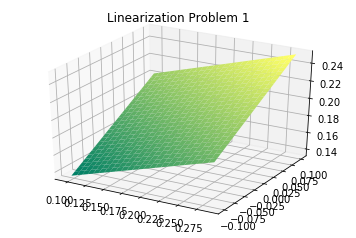

In [15]:
problem2_1_2()

## Exercise 2.

In [29]:
def problem2_2_1(θ_0, params):
    
    α,β,ρ,σ = def_params()
    
    k_p2, k_p1, k, z_p1, z = θ_0
    
    return np.array([
        
        β*((α*np.exp(z_p1)*k_p1**(α-1))/(np.exp(z_p1)*k_p1**α-k_p2))-1/(np.exp(z)*k**α-k_p1)
        
    ])

In [30]:
def def_params2_2():
    
    A,K_ss,F,G,H,L,M,N,P,Q = problem2_1_1(ret=True)
    
    Z_ss = np.array([0.0])
    X,Y,Z,lnX,sylv = 1,0,1,0,0
    α,β,ρ,σ = def_params()
    θ_0 = np.array([K_ss,K_ss,K_ss,0.0,0.0])
    
    return Z_ss,X,Y,Z,lnX,sylv,α,β,ρ,θ_0

In [31]:
def problem2_2_2():
    
    Z_ss,X,Y,Z,lnX,sylv,α,β,NN,θ_0 = def_params2_2()
    args = (α,β)
    
    ([AA,BB,CC,DD,FF,GG,HH,JJ,KK,LL,MM, 
      WW,TT]) = LinApp_Deriv(problem2_2_1, 
      args,θ_0,X,Y,Z,lnX)
    
    np.set_printoptions(suppress=False)
    np.set_printoptions(precision=10)
    
    PP, QQ, UU, RR, SS, VV = LinApp_Solve(AA,BB,
    CC,DD,FF,GG,HH,JJ,KK,LL,MM,WW,TT,NN,Z_ss,sylv)

    print(" •  FF:",FF,"\n",
          "•  GG:",GG,"\n",
          "•  HH:",HH,"\n",
          "•  LL:",LL,"\n",
          "•  MM:",MM,"\n",
          "•  PP:",PP,"\n",
          "•  QQ:",QQ,"\n"     
     )
    
    return FF,GG,HH,LL,MM,PP,QQ

In [32]:
problem2_2_2()

 •  FF: [[7.3336764776]] 
 •  GG: [[-23.9477677954]] 
 •  HH: [[7.4833433553]] 
 •  LL: [[-1.4138053606]] 
 •  MM: [[4.1218815179]] 
 •  PP: [[0.3499999998]] 
 •  QQ: [[0.1927826187]] 



## Exercise 3.

The Laws of motion are

$$
\tilde{Z}_t=N\tilde{Z}_{t-1} + \varepsilon_t,
$$

and

$$
\tilde{X_t} = P\tilde{X}_{t-1}+Q\tilde{Z}_t,
$$

and so

$$
\begin{eqnarray*}
\\
0 &=& \mathbb E _t\left[ F \tilde{X}_{t+1} + G \tilde{X_t}+H \tilde{X}_{t-1} + L \tilde{Z}_{t+1} + M \tilde{Z_t} \right] \\ 
  &=& F \left( P \tilde{X_t}+ Q \tilde{Z}_{t+1}\right) + G \left( P \tilde{X}_{t-1} + Q \tilde{Z_t}\right) + H \tilde{X}_{t-1} + L N \tilde{Z}_{t} + M \tilde{Z_t} \\
  &=& F \left( P \left( P \tilde{X}_{t-1}+ Q \tilde{Z}_{t}\right)+ Q N \tilde{Z}_{t}\right) + G \left( P \tilde{X}_{t-1} + Q \tilde{Z}_t\right) + H \tilde{X}_{t-1} + L N \tilde{Z}_{t} + M \tilde{Z_t} \\
  &=&  F P^2 \tilde{X}_{t-1}+ F P Q \tilde{Z_t} + F Q N \tilde{Z}_{t} + G P \tilde{X}_{t-1} + G Q \tilde{Z}_t + H \tilde{X}_{t-1} + L N \tilde{Z}_{t} + M \tilde{Z_t} \\
  &=& \left((FP+G)P+H\right)\tilde{X}_{t-1}+\left((FQ+L)N+(FP+G)Q+M\right)\tilde{Z_t}.\\
\\
\end{eqnarray*}
$$

## Exercise 4.

In [80]:
def def_params4():
    γ=2.5
    ξ=1.5
    β=0.98
    α=0.4
    a=0.5
    δ=0.10
    z_ss = 0
    ρ_z=0.9
    τ=0.05
    tol = 1e-10
    guess = np.array([4,0.5])
    return γ,ξ,β,α,a,δ,z_ss,ρ_z,τ,tol,guess

In [81]:
def problem2_4_1(X_p1,X,Y,Z,args):
    
    Y = X**α*(np.exp(Z)*Y)**(1-α)
    w = (1-α)*X**α*Y**(-1*α)*np.exp(Z)**(1-α)
    r = α*(X**(α-1))*(Y**(1-α))*np.exp(Z)**(1-α)
    c = (w*Y+(r-δ)*X)+X-X_p1
    u = ((((c**(1-γ))-1)/(1-γ))+a*(((1-Y)
        **(1-ξ)-1)/(1-ξ)))
    
    return Y,w,r,c,u

In [82]:
def problem2_4_2(θ_0,args,ret=False):
    
    
    L = Y
    
    γ,ξ,β,α,a,δ,z_ss,ρ_z,τ,tol,guess = def_params4()
    
    args = (α,β)
    
    Y,w,r,c,u = problem2_4_1(X_p1,X,Y,Z,args)
    Y_p1,w_p1,r_p1,c_p1,u_p1 = problem2_4_1(X_p2,X_p1,Y_p1,Z_p1,args)
  
    if ret: return θ_0

    return np.array([
        
        a*((1-L)**(-1*ξ))-w*(1-τ)*(c**(-1*γ)),
        (c**(-γ))-β*(c_p1**(-1*γ))*((1-τ)*(r_p1-δ)+1)
        
        ])

In [83]:
def problem2_4_3(ret = False):
    
    γ,ξ,β,α,a,δ,z_ss,ρ_z,τ,tol,guess = def_params4()
    
    args = (α,β)
    
    A,K_ss,F,G,H,L,M,N,P,Q = problem2_1_1(ret = True)    

    ss = LinApp_FindSS(problem2_4_2,args,guess,z_ss,X,Y)
    
    K_ss,L_ss = ss

    θ_0 = np.array([K_ss,K_ss,K_ss,L_ss,L_ss,0.0,0.0])

    if ret: return θ_0

    print (" •  Steady State X and Y:",ss)

In [84]:
def problem2_4_4():
    
    γ,ξ,β,α,a,δ,z_ss,ρ_z,τ,tol,guess = def_params4()
    
    A,K_ss,F,G,H,L,M,N,P,Q = problem2_1_1(ret = True)
    
    θ_0 = problem2_4_3(ret = True)
    
    K_ss,K_ss,K_ss,L_ss,L_ss,0.0,0.0 = list(θ_0)
        
    np.set_printoptions(suppress=False)
    np.set_printoptions(precision=10)
    
    if np.max(np.abs(problem2_4_2(θ_0,args)))>tol: print("Past Tolerance")

    Y_ss,w_ss,r_ss,c_ss,u_ss = problem2_4_1(K_ss,K_ss,L_ss,0,params)
    
    T_ss=τ*c_ss
    I_ss=δ*K_ss
    
    print (" •  Y_ss:",Y_ss,"\n",
           "•  w_ss:",w_ss,"\n",
           "•  r_ss:",r_ss,"\n",
           "•  c_ss:",c_ss,"\n",
           "•  u_ss:",u_ss,"\n",
           "•  T_ss:",T_ss,"\n",
           "•  I_ss:",I_ss
          )

SyntaxError: can't assign to literal (<ipython-input-84-f53f4a239260>, line 9)

In [85]:
problem2_4_4()

NameError: name 'X' is not defined

## Exercise 5.

For the same model as above, find $\frac {\partial y}{\partial x}$ for $y \in \left\{\bar k, c, \bar r, \bar w, \bar \ell, \bar T, \bar y, \bar \imath \right\}$ and $x \in \left\{\delta, \tau, \bar z, \alpha, \gamma, \xi, \beta, a \right\}$ using numerical techniques.

In [86]:
def problem2_5_1(guess, args):
    
    γ,ξ,β,α,a,δ,τ,z_ss = args
    
    w = (1-α)*((guess[0])**α)*((guess[1]*np.exp(z))**(-α))*np.exp(z)
    r = α*((guess[0])**(α-1))*((guess[1]*np.exp(z))**(1-α))
    T = τ*(guess[1]*w+(r-δ)*guess[0])
    c = (1-τ)*(w*guess[1]+(r-δ)*guess[0])+T
    
    return np.array([
        
        1-β*((r-δ)*(1-τ)+1),
        a/((1-guess[1])**ξ)-(1/(c**γ))*w*(1-τ)
        
    ])

In [87]:
def problem2_5_2(args, guess):
    
    γ,ξ,β,α,a,δ,τ,z_ss = args
    
    root = opt.root(problem2_5_1, guess, [γ, ξ, β, α, a, δ, τ, z_ss], tol=1e-8)  
    k_ss, l_ss = root.x
    y_ss = (k_ss**(α))*((l_ss*np.exp(z))**(1-α))
    i_ss = δ*k_ss
    w_ss = (1-α)*((k_ss)**α)*((l_ss*np.exp(z))**(-α))*np.exp(z)
    r_ss = α*((k_ss)**(α-1))*((l_ss*np.exp(z))**(1-α))
    T_ss = τ*(l_ss*w_ss+(r_ss-δ)*k_ss)
    c_ss = (1-τ)*(w_ss*l_ss+(r_ss-δ)*k_ss)+T_ss
    
    return k_ss, l_ss, y_ss, w_ss, r_ss, T_ss, c_ss, i_ss

In [88]:
def problem2_5_3(f, x, x_pε):
    return (f(x) - f(x_pε)) / np.sum(x - x_pε)

In [89]:
def problem2_5_4():
    
    γ,ξ,β,α,a,δ,z_ss,ρ_z,τ,tol,guess = def_params4()
    
    params = γ,ξ,β,α,a,δ,τ,z_ss
    
    N = 10
    
    ε = 1e-8
    
    D = np.zeros((N,N))

    for i in range(N):
        
        params_pr = params
        temp = list(params_pr)
        temp[i] += ε
        params_pr_pr = tuple(temp)
        d = (np.array(problem2_5_2(params_pr_r))-
             np.array(problem2_5_2(params)))/ε
        D[:,i] = d
        
    print(D)

In [90]:
problem2_5_4()

NameError: name 'z' is not defined

## Exercise 6.

For the same model as above, let $X_t = \{k_{t−1}, \ell_{t−1}\}$. Find the values of $F, G, H, L, M, N, P$ and $Q$.

In [ ]:
def def_params6():
    γ,ξ,β,α,a,δ,z_ss,ρ_z,τ,tol,guess = def_params4()
    return δ,τ,z_ss,α,γ,ξ,β,a

In [72]:
def problem2_6_1(θ_0, args):
    
    X_p2,L_p2, X_p1,L_p1,X,L,Z_p1,Z = θ_0

    δ,τ,z_ss,α,γ,ξ,β,a = args
    
    Y,w,r,c,u = Modeldefs(X_p1,X,L_p1,Z,args)
    Yp,wp,rp,cp,up = Modeldefs(X_p2,X_p1,L_p2,Z_p1,args)    
    
    return np.array([
      
        a*((1-L)**(-ξ))-w*(1-τ)*(c**(-γ)),
        (c**(-γ))-β*(c_p1**(-γ))*((1-τ)*(r_p1-δ)+1)
        
    ])


In [75]:
def problem2_6_2():
    Z_ss = np.array([z_ss])
    X,Y,Z,lnX,sylv = 2,0,1,0,0
    
    guess = np.array([4,0.5])

    SS = LinApp_FindSS(problem2_6_1, def_params6(), guess, Z_ss, X, Y)
    K_ss, L_ss = SS
    
    print (" •  Steady State X and Y:",SS)

    θ_0 = np.array([K_ss, L_ss, K_ss, L_ss, K_ss, L_ss, 0.0, 0.0])
    
    print(" •  K_ss and L_ss:",K_ss,L_ss)
    
    
    
    check = problem2_6_1(θ_0, args)
    
    np.set_printoptions(suppress=False)
    np.set_printoptions(precision=10)
    print ("check: ", check)
    if np.max(np.abs(check))>1e-10:print("Above Tolerance.")

    Y_ss,w_ss,r_ss,c_ss,u_ss = Modeldefs(K_ss,K_ss,L_ss,0,args)
    
    T_ss = τ*c_ss
    I_ss =  δ*k_ss
    
    print ("Y_ss: ", Y_ss)
    print ("w_ss: ", w_ss)
    print ("r_ss: ", r_ss)
    print ("c_ss: ", c_ss)
    print ("u_ss: ", u_ss)
    print ("T_ss: ", T_ss)
    print ("I_ss: ", I_ss)


## Exercise 7.

For the same model as above, generate $10,000$ artificial time series for an economy where each time series is $250$ periods long. Start each simulation off with a starting value for k equal to the steady state value, and a value of $z = 0$.

Use $\sigma^2_z = .0004.$

For each simulation save the time-series for GDP, consumption, investment, and the labor input. When all $10,000$ simulations have finished generate a graph for each of these time-series showing the average value over the simulations for each period, and also showing the five and ninety-five percent confidence bands for each series each period.

In [ ]:
def problem2_7_1(PP, QQ, k_l, z):
    return PP@k_l+QQ*z

In [ ]:
def problem2_7_2(T=250,N=10_000):

    σ_2 = 0.0004

    K_out = np.zeros((N,T))
    L_out = np.zeros((N,T))
    c_out = np.zeros((N,T))
    Y_out = np.zeros((N,T))
    I_out = np.zeros((N,T))

    for i in range(N):

        k_and_l = np.array([[0],[0]])
        z = 0.0

        t_s_k = np.zeros((1,T))
        t_s_l = np.zeros((1,T))
        t_s_c = np.zeros((1,T))
        t_s_y = np.zeros((1,T))
        t_s_i = np.zeros((1,T))
        t_s_z = np.zeros((1,T))

        for j in range(T):

            k_and_l_use = k_and_l.copy()
            t_s_k[:,j] = k_and_l_pr[0]
            t_s_l[:,j] = k_and_l_pr[1]
            t_s_z[:,j] = z


        k_and_l_1 = PP@k_and_l+QQ*z
        k_and_l = k_and_l_pr.copy()
            
        z_pr = 0.9*z+np.random.normal(0,np.sqrt(σ_2))
        z = z_pr

        t_s_k_m = t_s_k+k_ss
        t_s_l_m = t_s_l+l_ss
        t_s_k1_m = np.roll(t_s_k_m,-1)


        w = (1-α)*(t_s_k_m**α)*((t_s_l_m*np.exp(t_s_z))**(-α))*np.exp(t_s_z)
        r = α*(t_s_k_m**(α-1))*(t_s_l_m*np.exp(t_s_z))**(1-α)


        t_s_c = w*t_s_l_m+(r-δ)*t_s_k_m+t_s_k_m-t_s_k1_m
        t_s_i = t_s_k1_m-t_s_k_m+δ*t_s_k_m
        t_s_y = (t_s_k_m**α)*(t_s_l_m*np.exp(t_s_z))**(1-α)

        K_out[i,:] = t_s_k_m
        L_out[i,:] = t_s_l_m
        Y_out[i,:] = t_s_y
        c_out[i,:] = t_s_c
        I_out[i,:] = t_s_i

    return K_out,L_out,Y_out,c_out,I_out

In [ ]:
def problem2_7_3():

    K,L,Y,C,I = problem2_7_2()


    E_k = K.mean(0)
    E_k_t = K.mean(1)

    SD_k_t = np.std(K,axis=1)

    coeff_k = E_k_t/SD_k_t
    k_hi = np.percentile(K,95,axis=0)
    k_lo = np.percentile(K,5,axis=0)


    E_l = L.mean(0)
    E_l_t = L.mean(1)

    SD_l_t = np.std(L,axis=1)

    coeff_l = E_l_t/SD_l_t
    l_hi = np.percentile(L,95,axis=0)
    l_lo = np.percentile(L,5,axis=0)


    E_y = Y.mean(0)
    E_y_t = Y.mean(1)
    SD_y_t = np.std(Y,axis=1)
    coeff_y = E_y_t/SD_y_t


    y_hi = np.percentile(Y,95,axis=0)
    y_lo = np.percentile(Y,5,axis=0)

    E_c = C.mean(0)
    E_c_t = C.mean(1)

    SD_c_t = np.std(C,axis=1)

    coeff_c = E_c_t/SD_c_t
    c_hi = np.percentile(C,95,axis=0)
    c_lo = np.percentile(C,5,axis=0)

    E_i = I.mean(0)
    E_i_t = I.mean(1)

    SD_i_t = np.std(I,axis=1)

    coeff_i = E_i_t/SD_i_t
    i_hi = np.percentile(I,95,axis=0)
    i_lo = np.percentile(I,5,axis=0)
    
    
    
    return E_k, k_hi, k_lo, E_l, l_hi, l_lo, E_y, y_hi, y_lo, E_i, i_hi, i_lo

In [ ]:
def problem2_7_4():
    
    E_k, k_hi, k_lo, E_l, l_hi, l_lo, E_y, y_hi, y_lo, E_i, i_hi, i_lo = problem2_7_3()
    
    plt.style.use("seaborn-darkgrid")
    plt.figure(figsize=(10,10))

    plt.subplot(221)
    plt.plot(range(250), E_k.T)
    plt.plot(range(250), k_hi.T)
    plt.plot(range(250), k_lo.T)
    plt.xlabel("$T$")
    plt.title("$K$")

    plt.subplot(222)
    plt.plot(range(250),E_l.T)
    plt.plot(range(250),l_hi.T)
    plt.plot(range(250),l_lo.T)
    plt.xlabel("$T$")
    plt.title("$\ell$")

    plt.subplot(223)
    plt.plot(range(250),E_y.T)
    plt.plot(range(250),y_hi.T)
    plt.plot(range(250),y_lo.T)
    plt.xlabel("$T$")
    plt.title("$Y$")

    plt.subplot(224)
    plt.plot(range(249),E_i.T[0:249])
    plt.plot(range(249),i_hi.T[0:249])
    plt.plot(range(249),i_lo.T[0:249])
    plt.xlabel("$T$")
    plt.title("$I$")

    plt.show()

In [ ]:
problem2_7_4()

## Exercise 8.

For the same model as above, calculate: the mean, volatility (standard deviation),
coefficient of variation (mean divided by standard deviation), relative volatility
(standard deviation divided bu the standard deviation of output), persistence (autocorrelation),
and cyclicality (correlation with output); for each series over each simulation and
report the average values and standard errors for these moments over the 10,000 simulations

In [ ]:
def problem2_8():

    E_k, k_hi, k_lo, E_l, l_hi, l_lo, E_y, y_hi, y_lo, E_i, i_hi, i_lo = problem2_7_3()

    print(

    "--- MEAN ---","\n",
    "•  Y avg and SD:",E_y_t.mean(),E_y_t.std(),"\n",
    "•  C avg and SD:",E_c_t.mean(),E_c_t.std(),"\n",
    "•  I avg and SD:",E_i_t.mean(),E_i_t.std(),"\n",
    "•  L avg and SD:",E_l_t.mean(),E_l_t.std(),"\n",
    "--- VOLATILITY ---","\n",
    "•  Y avg and SD:",SD_y_t.mean(),SD_y_t.std(),"\n",
    "•  C avg and SD:",SD_c_t.mean(),SD_c_t.std(),"\n",
    "•  I avg and SD:",SD_i_t.mean(),SD_i_t.std(),"\n",
    "•  L avg and SD:",SD_l_t.mean(),SD_l_t.std(),"\n",
    "--- COEFFICIENT OF VARIATION ---","\n",
    "•  Y avg and SD:",coeff_y.mean(),coeff_y.std(),"\n",
    "•  C avg and SD:",coeff_c.mean(),coeff_c.std(),"\n",
    "•  I avg and SD:",coeff_i.mean(),coeff_i.std(),"\n",
    "•  L avg and SD:",coeff_l.mean(),coeff_l.std(),"\n"
        
    )

In [ ]:
problem2_8()

## Exercise 9.

For the same model as above, generate impulse response functions for: GDP,
consumption, investment and total labor input; with lags from zero to forty periods.

In [79]:
def problem2_9_1(T=40,n=1):
    
    FF,GG,HH,LL,MM,PP,QQ = problem2_2_2()
    
    k_out = np.zeros((n, T))
    l_out = np.zeros((n, T))
    c_out = np.zeros((n, T))
    y_out = np.zeros((n, T))
    i_out = np.zeros((n, T))
    
    for i in range(n):
        k_and_l = np.array([[0], [0]])
        
        z = 2e-3
        
        t_s_k = np.zeros((1, T))
        t_s_l = np.zeros((1, T))
        t_s_c = np.zeros((1, T))
        t_s_y = np.zeros((1, T))
        t_s_i = np.zeros((1, T))
        t_s_z = np.zeros((1, T))
        
        
        for j in range(T):
            
            temp = k_and_l.copy()
            
            t_s_k[:,j]=temp[0]
            t_s_l[:,j]=temp[1]
            t_s_z[:,j]=z
         
            k_and_l_pr = PP@k_and_l + QQ*z
            k_and_l = k_and_l_pr.copy()
            z *= 0.9
            
            
        t_s_k_m = ts_k+k_ss
        t_s_l_m = ts_l+l_ss
        t_s_k_pr_m = np.roll(t_s_k_m,-1)
        
        w = (1-α)*(t_s_k_m**α)*((t_s_l_m*np.exp(t_s_z))**(-1*α))*np.exp(t_s_z)
        r = α*(t_s_k_m**(α-1))*(t_s_l_m*np.exp(t_s_z))**(1-α)
        
        ts_c = w*t_s_l_m+(r-δ)*t_s_k_m+t_s_k_m-t_s_k_pr_m
        ts_i = t_s_k_pr_m-t_s_k_m+δ*t_s_k_m
        ts_y = (t_s_k_m**α)*(t_s_l_m*np.exp(t_s_z))**(1-α)
        
        k_out[i,:] = t_s_k_m
        l_out[i,:] = t_s_l_m
        y_out[i,:] = t_s_y
        c_out[i,:] = t_s_c
        i_out[i,:] = t_s_i
        
    return (k_out,l_out,y_out,c_out,i_out)

In [77]:
def problem2_9_2():
    
    K,L,Y,C,I = problem2_9_1()
    
    plt.style.use("seaborn-darkgrid")
    plt.figure(figsize=(10, 10))

    plt.subplot(221)
    plt.plot(range(39), C.T[0:39])
    plt.xlabel("$T$")
    plt.title("$c$")

    plt.subplot(222)
    plt.plot(range(40), L.T)
    plt.xlabel("$T$")
    plt.title("$\ell$")

    plt.subplot(223)
    plt.plot(range(40), Y.T)
    plt.xlabel("$T$")
    plt.title("$Y$")

    plt.subplot(224)
    plt.plot(range(39), I.T[0:39])
    plt.xlabel("$T$")
    plt.title("$I$")

    plt.show()

In [78]:
problem2_9_2()

NameError: name 'PP' is not defined

## Exercise 10.

I nor my classmates knew how to do this problem.

## Exercise 11.

I nor my classmates knew how to do this problem.

# Perturbation Methods.

## Problem 1.

For the general case,

$$
\begin{eqnarray*}
&& \frac{\partial^{2}x}{\partial u^{2}}\left(\frac{\partial^{2}F}{\partial x^{2}}\cdot\frac{\partial x}{\partial u}+\frac{\partial^{2}F}{\partial x\partial u}\right)+\frac{\partial F}{\partial x}\cdot\frac{\partial^{3}x}{\partial u^{3}}+\frac{\partial x}{\partial u}\left(\frac{\partial^{3}F}{\partial x^{3}}\cdot\frac{\partial x}{\partial u}\cdot\frac{\partial x}{\partial u}\cdots\right. \\
&& \left.\cdots + \frac{\partial^{3}F}{\partial x^{2}\partial u}\cdot\frac{\partial x}{\partial u}+\frac{\partial^{2}F}{\partial x^{2}}\cdot\frac{\partial^{2}x}{\partial u^{2}}+\frac{\partial^{3}F}{\partial x\partial u^{2}}+\frac{\partial^{3}F}{\partial x\partial u\partial x}\cdot\frac{\partial x}{\partial u}\right)  \cdots \\
&& \cdots + \frac{\partial^{2}x}{\partial u^{2}}\left(\frac{\partial^{2}F}{\partial x^{2}}\cdot\frac{\partial x}{\partial u}+\frac{\partial^{2}F}{\partial x\partial u}\right)+\frac{\partial x}{\partial u}\left(\frac{\partial^{3}F}{\partial u^{3}}+\frac{\partial^{3}F}{\partial x\partial u\partial x}\cdot\frac{\partial x}{\partial u}\right)  \cdots \\
&& \cdots + \frac{\partial^{2}F}{\partial x\partial u}\cdot\frac{\partial^{2}x}{\partial u^{2}}+\frac{\partial^{3}F}{\partial u^{3}}+\frac{\partial^{3}F}{\partial u^{2}\partial x}\cdot\frac{\partial x}{\partial u} \\
&=& 0.
\end{eqnarray*}
$$

One can solve for specific partials through tedious algebra.

## Problem 2.

In [122]:
def problem3_2_1(α,w,k,z):
    # LD
    return k*((1-α)*z/w)**(1/α)

In [123]:
def problem3_2_2(α, w, k, z):
    # prof
    return z*(k**α)*(problem3_2_1(α,w,k,z))**(1-α)-w*problem3_2_1(α,w,k,z)

In [124]:
def problem3_2_3(α, w, k, z, h, b, t):
    # LS
    return h-b*(w*h+problem3_2_2(α,w,k,z)-t)/(w*(1+b))

In [125]:
def problem3_2_4(w, labs):
    # errors (lab_err)
    α, k, z, h, b, t = labs
    return problem3_2_3(α,w,k,z,h,b,t) - problem3_2_1(α,w,k,z)

In [126]:
def def_params3_2():
    w = 0.01
    α = 0.33
    k = 5
    z = 1
    b = 2
    t = 0.1
    h = 24
    return (
        w,α,k,z,b,t,h
    )

In [129]:
def problem3_2_5():
    w,α,k,z,b,t,h = def_params3_2()
    print(" •  Wage:", 
          str(opt.fsolve(problem3_2_4, w, [α, k, z, h, b, t], xtol=1e-10))[1:-1]
         )

In [130]:
problem3_2_5()

 •  Wage: 0.62736178


In [169]:
def problem3_2_6(k):
    w,α,k2,z,b,t,h = def_params3_2()
    return opt.fsolve(problem3_2_4, .1, [α,k,z,h,b,t], xtol=1e-10)

In [178]:
def problem3_2_7(f,x,h=1e-3):
    return (f(x+h)-f(x-h))/(2*h)

In [179]:
def problem3_2_8(f,x,h=1e-3):
    return (f(x+h)+f(x-h)-2*f(x))/(h**2)

In [180]:
def problem3_2_9(f,x_0,x):
     return f(x_0)+problem3_2_7(f,x_0)*(x-x_0) 

In [181]:
def problem3_2_10(f,x_0,x):
    return f(x_0)+problem3_2_7(f,x_0)*(x-x_0)+0.5*problem3_2_8(f,x_0)*(x-x_0)**2

In [194]:
def problem3_2_11():
    k_grid = np.linspace(1,15,100)

    f = problem3_2_9(problem3_2_6,5,k_grid)
    s = problem3_2_10(problem3_2_6,5,k_grid)
    a = np.zeros(100)

    for i in range(len(k_grid)):
        a[i] = problem3_2_6(k_grid[i])

    plt.style.use("seaborn-darkgrid")
    plt.figure(figsize=(10,10))
    palette = plt.get_cmap("Dark2")

    plt.plot(k_grid,f,label="First-Order Taylor",color=palette(3))
    plt.plot(k_grid,s,label="Second-Order Taylor",color=palette(1))
    plt.plot(k_grid,a,label ="Actual",color=palette(0))
    plt.legend()
    
    plt.xlabel("$K$")
    plt.ylabel("$W$")

    plt.show()

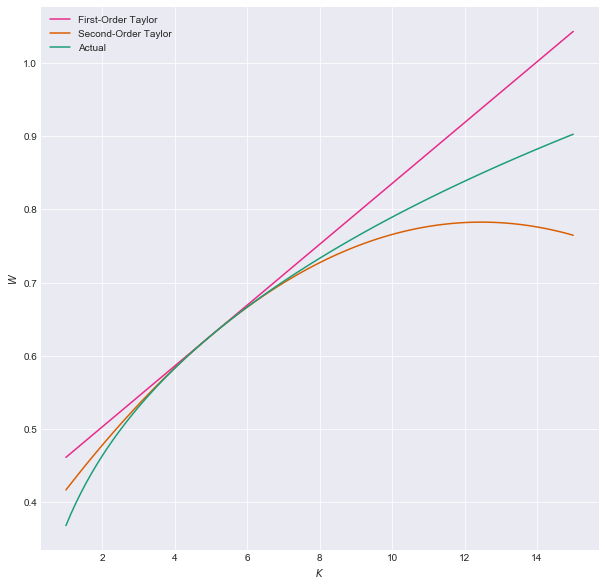

In [195]:
problem3_2_11()

In [196]:
def problem3_2_12():
    k_grid = np.linspace(1,15,100)

    f = problem3_2_9(problem3_2_6,10,k_grid)
    s = problem3_2_10(problem3_2_6,10,k_grid)
    a = np.zeros(100)
    
    for i in range(len(kgrid)):
        a[i] = problem3_2_6(k_grid[i])

    plt.style.use("seaborn-darkgrid")
    plt.figure(figsize=(10,10))
    palette = plt.get_cmap("Dark2")

    plt.plot(k_grid,f,label="First-Order Taylor",color=palette(3))
    plt.plot(k_grid,s,label="Second-Order Taylor",color=palette(1))
    plt.plot(k_grid,a,label ="Actual",color=palette(0))
    plt.legend()
    
    plt.xlabel("$K$")
    plt.ylabel("$W$")

    plt.show()

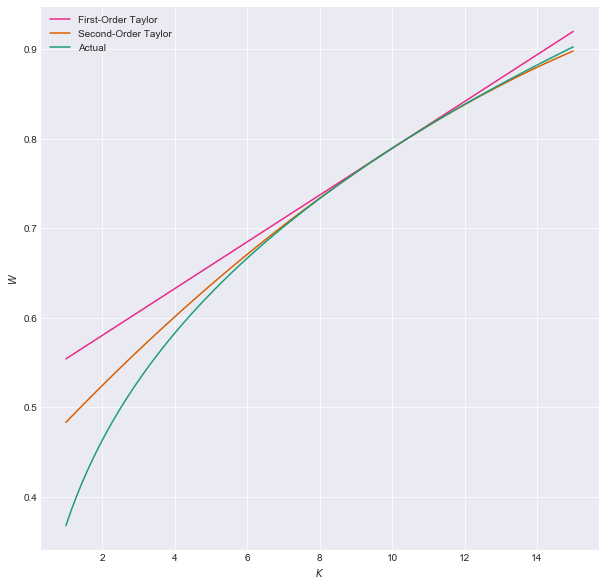

In [197]:
problem3_2_12()

## Problem 3.

In [205]:
def problem3_3_1(y,x):
    # F_err
    return (x**0.35 + 0.9*x - y)**(-2.5) - 0.95*(y**0.35 + 0.9*y)**(-2.5)

In [206]:
def problem3_3_2(f,x,h=1e-3):
    return (f(x+h)-f(x-h))/(2*h)

In [207]:
def problem3_3_3(f,x,h=1e-3):
    return (f(x+h)+f(x-h)-2*f(x))/(h**2)

In [208]:
def problem3_3_4(f,x,h=1e-3):
    return (f(x+2*h)-2*f(x+h)+2*f(x-h)-f(x-2*h))/(2*(h**3))

In [209]:
def problem3_3_5(f,x_0,x):
    return f(x_0)+problem3_3_2(f,x_0)*(x-x_0) 

In [210]:
def problem3_3_6(f,x_0,x):
    return f(x_0)+problem3_3_2(f,x_0)*(x-x_0)+1/2*problem3_3_3(f,x_0)*(x-x_0)**2

In [211]:
def problem3_3_7(f, x_0, x):
    return f(x_0)+problem3_3_2(f,x_0)*(x-x_0)+1/2*problem3_3_2(f,x_0)*(x-x_0)**2+1/6*problem3_3_4(f,x_0)*(x-x_0)**3

In [212]:
def problem3_3_8(x):
    return opt.fsolve(problem3_3_1,50,x,xtol=1e-10)

In [213]:
def problem3_3_9():
    
    X = np.linspace(99, 101, 100)

    f = problem3_3_5(problem3_3_8,100,X)
    s = problem3_3_6(problem3_3_8,100,X)
    t = problem3_3_7(problem3_3_8,100,X)
    a = np.zeros(100)
    
    for i in range(len(X)):
        a[i] = problem3_3_8(X[i])

    f_e, s_e, t_e = a-f, a-s, a-t

    plt.style.use("seaborn-darkgrid")
    plt.figure(figsize=(10,10))
    palette = plt.get_cmap("Dark2")

    plt.plot(X,f_e,label="First-Order Taylor Error", color=palette(3))
    plt.plot(X,s_e,label="Second-Order Taylor Error", color=palette(1))
    plt.plot(X,t_e,label ="Third-Order Taylor Error", color=palette(0))
    plt.legend()
    
    plt.xlabel("$X$")
    plt.ylabel("Error")

    plt.show()

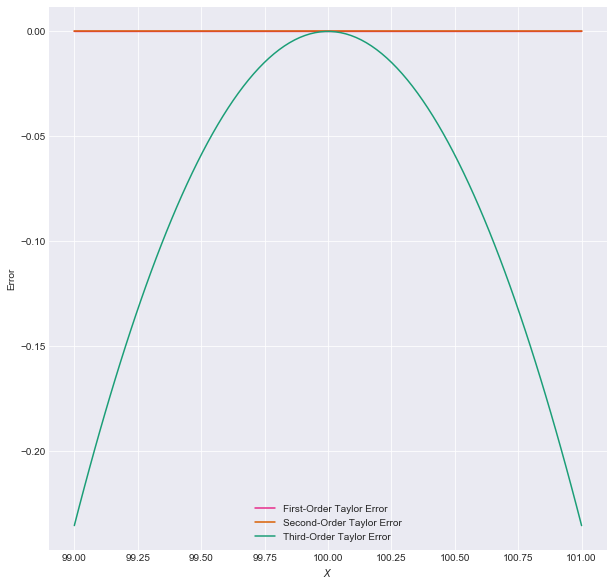

In [214]:
problem3_3_9()

## Problems 4 and 5.

In [113]:
def problem3_4():
    
    baseline = yaml_import("baseline.yaml")
    baseline.residuals()
    print(baseline)

    perturbed = algos.dtcscc.perturbations.perturbate(baseline)

In [114]:
problem3_4()


Model:
------
name: "BaselineModel"
type: "dtcscc"
file: "baseline.yaml

Equations:
----------

transition
 1  : 0.0000 : k = i(-1)
 2  : 0.0000 : z = rho_z*z(-1) + e_z

arbitrage
 1  : 0.0000 : 1 - beta*(c/c(1))*(rk(1))   | 0.0 <= i <= inf




AttributeError: module 'dolo.algos.dtcscc' has no attribute 'perturbations'